Project context: https://www.theforage.com/modules/NkaC7knWtjSbi6aYv/Dow9ZpbYKSGC5yHau?ref=tvikfrytzCFR8k4Gy

# Task 1: Data preparation and customer analytics

Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
%matplotlib inline

Importing the data from excel and csv files

In [68]:
transactions = pd.read_excel('D:\\ProjectQuantium\\QVI_transaction_data.xlsx')

In [69]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [117]:
customers = pd.read_csv('D:\\ProjectQuantium\\QVI_purchase_behaviour.csv')

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## <center>DATA CLEANING part 1: transactions dataset<center>

Rectify the DATE column

In [70]:
transactions['DATE'] = pd.to_datetime(transactions['DATE'], unit='D', origin='1899-12-30')

In [71]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Add two separate columns for YEAR and MONTH

In [72]:
transactions['YEAR'] = pd.DatetimeIndex(transactions['DATE']).year
transactions['MONTH'] = pd.DatetimeIndex(transactions['DATE']).month

In [73]:
import calendar
transactions['MONTH'] = transactions['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [74]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,Oct
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,May
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,May
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,Aug
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,Aug


In [75]:
transactions.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,Mar
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,Aug
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,Nov
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,Dec
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,2018,Sep


Extract the product weights in another column

In [76]:
transactions['PROD_NAME'].nunique()

114

In [77]:
transactions['PROD_NBR'].nunique()

114

In [78]:
transactions['PROD_WEIGHT'] = transactions['PROD_NAME'].str[-4:]

In [79]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,Oct,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,May,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,May,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,Aug,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,Aug,150g


In [80]:
transactions['PROD_WEIGHT'].nunique()

24

In [81]:
transactions['PROD_WEIGHT'].unique()

array(['175g', '170g', '150g', '300g', '330g', '210g', '210G', '270g',
       '220g', '125g', '110g', '134g', '150G', '175G', '380g', '180g',
       '165g', 'Salt', '250g', '200g', '160g', '190g', ' 90g', ' 70g'],
      dtype=object)

Rectify the one unusual PROD_WEIGHT value

In [82]:
transactions['PROD_NAME'][transactions['PROD_WEIGHT']=="Salt"]

65        Kettle 135g Swt Pot Sea Salt
153       Kettle 135g Swt Pot Sea Salt
174       Kettle 135g Swt Pot Sea Salt
177       Kettle 135g Swt Pot Sea Salt
348       Kettle 135g Swt Pot Sea Salt
                      ...             
264564    Kettle 135g Swt Pot Sea Salt
264574    Kettle 135g Swt Pot Sea Salt
264725    Kettle 135g Swt Pot Sea Salt
264767    Kettle 135g Swt Pot Sea Salt
264823    Kettle 135g Swt Pot Sea Salt
Name: PROD_NAME, Length: 3257, dtype: object

In [83]:
transactions['PROD_WEIGHT'][transactions['PROD_WEIGHT']=="Salt"] = '135g'

<ipython-input-83-b15b9587faa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['PROD_WEIGHT'][transactions['PROD_WEIGHT']=="Salt"] = '135g'


In [84]:
transactions['PROD_WEIGHT'].unique()

array(['175g', '170g', '150g', '300g', '330g', '210g', '210G', '270g',
       '220g', '125g', '110g', '134g', '150G', '175G', '380g', '180g',
       '165g', '135g', '250g', '200g', '160g', '190g', ' 90g', ' 70g'],
      dtype=object)

In [85]:
transactions['PROD_WEIGHT'][transactions['PROD_WEIGHT']=="210G"] = '210g'
transactions['PROD_WEIGHT'][transactions['PROD_WEIGHT']=="150G"] = '150g'
transactions['PROD_WEIGHT'][transactions['PROD_WEIGHT']=="175G"] = '175g'

<ipython-input-85-e08f30919819>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['PROD_WEIGHT'][transactions['PROD_WEIGHT']=="210G"] = '210g'
<ipython-input-85-e08f30919819>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['PROD_WEIGHT'][transactions['PROD_WEIGHT']=="150G"] = '150g'
<ipython-input-85-e08f30919819>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['PROD_WEIGHT'][transactions['PROD_W

In [86]:
transactions['PROD_WEIGHT'].unique()

array(['175g', '170g', '150g', '300g', '330g', '210g', '270g', '220g',
       '125g', '110g', '134g', '380g', '180g', '165g', '135g', '250g',
       '200g', '160g', '190g', ' 90g', ' 70g'], dtype=object)

Extract the product brands in another column

In [87]:
#extract first word of PROD_NAME
transactions['PROD_BRAND'] = transactions['PROD_NAME'].str.split(' ').str[0]

In [88]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_WEIGHT,PROD_BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,Oct,175g,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,May,175g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,May,170g,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,Aug,175g,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,Aug,150g,Kettle


In [89]:
transactions['PROD_BRAND'].nunique()

29

Check the unique brand names, clarify their correctness and find out if the same brand has been denoted differently more than once

In [90]:
transactions['PROD_BRAND'].sort_values().unique()

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Old', 'Pringles', 'RRD', 'Red',
       'Smith', 'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos',
       'Twisties', 'Tyrrells', 'WW', 'Woolworths'], dtype=object)

In [91]:
transactions[transactions['PROD_BRAND']=='Burger']['PROD_NAME'].value_counts()

Burger Rings 220g    1564
Name: PROD_NAME, dtype: int64

In [92]:
transactions[transactions['PROD_BRAND']=='French']['PROD_NAME'].value_counts()

French Fries Potato Chips 175g    1418
Name: PROD_NAME, dtype: int64

In [93]:
transactions[transactions['PROD_BRAND']=='NCC']['PROD_NAME'].value_counts()

NCC Sour Cream &    Garden Chives 175g    1419
Name: PROD_NAME, dtype: int64

In [94]:
transactions[transactions['PROD_BRAND']=='Natural']['PROD_NAME'].value_counts()

Natural Chip Co     Tmato Hrb&Spce 175g    1572
Natural ChipCo Sea  Salt & Vinegr 175g     1550
Natural Chip        Compny SeaSalt175g     1468
Natural ChipCo      Hony Soy Chckn175g     1460
Name: PROD_NAME, dtype: int64

In [95]:
transactions[transactions['PROD_BRAND']=='Old']['PROD_NAME'].value_counts()

Old El Paso Salsa   Dip Chnky Tom Ht300g    3125
Old El Paso Salsa   Dip Tomato Med 300g     3114
Old El Paso Salsa   Dip Tomato Mild 300g    3085
Name: PROD_NAME, dtype: int64

In [71]:
transactions[transactions['PROD_BRAND']=='WW']['PROD_NAME'].value_counts()

WW Supreme Cheese   Corn Chips 200g       1509
WW Original Corn    Chips 200g            1495
WW Original Stacked Chips 160g            1487
WW Sour Cream &OnionStacked Chips 160g    1483
WW D/Style Chip     Sea Salt 200g         1469
WW Crinkle Cut      Chicken 175g          1467
WW Crinkle Cut      Original 175g         1410
Name: PROD_NAME, dtype: int64

In [72]:
transactions[transactions['PROD_BRAND']=='Woolworths']['PROD_NAME'].value_counts()

Woolworths Cheese   Rings 190g    1516
Woolworths Mild     Salsa 300g    1491
Woolworths Medium   Salsa 300g    1430
Name: PROD_NAME, dtype: int64

Check products with the term 'Salsa' and remove those which are not chips but sauce

In [99]:
transactions[transactions['PROD_NAME'].str.contains("salsa|Salsa")][['PROD_NAME','PROD_BRAND']].value_counts()

PROD_NAME                                 PROD_BRAND
Old El Paso Salsa   Dip Chnky Tom Ht300g  Old           3125
Old El Paso Salsa   Dip Tomato Med 300g   Old           3114
Old El Paso Salsa   Dip Tomato Mild 300g  Old           3085
Woolworths Mild     Salsa 300g            Woolworths    1491
Doritos Salsa Mild  300g                  Doritos       1472
Smiths Crinkle Cut  Tomato Salsa 150g     Smiths        1470
Red Rock Deli SR    Salsa & Mzzrlla 150g  Red           1458
Doritos Salsa       Medium 300g           Doritos       1449
Woolworths Medium   Salsa 300g            Woolworths    1430
dtype: int64

In [100]:
slsa_index = transactions[transactions['PROD_NAME'].str.contains("salsa|Salsa") & 
                          ((transactions['PROD_BRAND']!="Smiths")&(transactions['PROD_BRAND']!="Red"))].index

In [101]:
transactions.drop(slsa_index,0,inplace=True)
transactions.reset_index(drop=True,inplace=True)

<ipython-input-101-87a1297f8991>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  transactions.drop(slsa_index,0,inplace=True)


In [102]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_WEIGHT,PROD_BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,Oct,175g,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,May,175g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,May,170g,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,Aug,175g,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,Aug,150g,Kettle


In [104]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249670 entries, 0 to 249669
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            249670 non-null  datetime64[ns]
 1   STORE_NBR       249670 non-null  int64         
 2   LYLTY_CARD_NBR  249670 non-null  int64         
 3   TXN_ID          249670 non-null  int64         
 4   PROD_NBR        249670 non-null  int64         
 5   PROD_NAME       249670 non-null  object        
 6   PROD_QTY        249670 non-null  int64         
 7   TOT_SALES       249670 non-null  float64       
 8   YEAR            249670 non-null  int64         
 9   MONTH           249670 non-null  object        
 10  PROD_WEIGHT     249670 non-null  object        
 11  PROD_BRAND      249670 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 22.9+ MB


Make corrections wherever necessary by rectifying the dual representation of the same brand

In [105]:
def brand_correction(old,new):
    transactions['PROD_BRAND'][transactions['PROD_BRAND']==old] = new

In [106]:
brand_correction('Dorito','Doritos')
brand_correction('Grain','GrainWaves')
brand_correction('GrnWves','GrainWaves')
brand_correction('Infzns','Infuzions')
brand_correction('Natural','NCC')
brand_correction('Red','RRD')
brand_correction('Smith','Smiths')
brand_correction('Snbts','Sunbites')
brand_correction('WW','Woolworths')

<ipython-input-105-8694df0ffd26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['PROD_BRAND'][transactions['PROD_BRAND']==old] = new


In [107]:
transactions['PROD_BRAND'].sort_values().unique()

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'GrainWaves', 'Infuzions', 'Kettle', 'NCC', 'Pringles',
       'RRD', 'Smiths', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'Woolworths'], dtype=object)

In [108]:
transactions['PROD_BRAND'].nunique()

20

In [109]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_WEIGHT,PROD_BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,Oct,175g,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,May,175g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,May,170g,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,Aug,175g,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,Aug,150g,Kettle


In [110]:
transactions.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_WEIGHT,PROD_BRAND
249665,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,Mar,175g,Kettle
249666,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,Aug,175g,Tostitos
249667,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,Nov,170g,Doritos
249668,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,Dec,150g,Doritos
249669,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,2018,Sep,175g,Tostitos


In [111]:
transactions.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'YEAR', 'MONTH', 'PROD_WEIGHT',
       'PROD_BRAND'],
      dtype='object')

In [112]:
transactions = transactions[['DATE', 'YEAR', 'MONTH', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 
                             'PROD_NBR', 'PROD_NAME', 'PROD_BRAND', 'PROD_WEIGHT', 'PROD_QTY', 'TOT_SALES']]

In [113]:
transactions.head()

,DATE,YEAR,MONTH,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_BRAND,PROD_WEIGHT,PROD_QTY,TOT_SALES
0,2018-10-17,2018,Oct,1,1000,1,5,Natural Chip Compny SeaSalt175g,NCC,175g,2,6.0
1,2019-05-14,2019,May,1,1307,348,66,CCs Nacho Cheese 175g,CCs,175g,3,6.3
2,2019-05-20,2019,May,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths,170g,2,2.9
3,2018-08-17,2018,Aug,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,175g,5,15.0
4,2018-08-18,2018,Aug,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,150g,3,13.8


In [114]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249670 entries, 0 to 249669
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            249670 non-null  datetime64[ns]
 1   YEAR            249670 non-null  int64         
 2   MONTH           249670 non-null  object        
 3   STORE_NBR       249670 non-null  int64         
 4   LYLTY_CARD_NBR  249670 non-null  int64         
 5   TXN_ID          249670 non-null  int64         
 6   PROD_NBR        249670 non-null  int64         
 7   PROD_NAME       249670 non-null  object        
 8   PROD_BRAND      249670 non-null  object        
 9   PROD_WEIGHT     249670 non-null  object        
 10  PROD_QTY        249670 non-null  int64         
 11  TOT_SALES       249670 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 22.9+ MB


In [115]:
#export the dataframe to csv file
transactions.to_csv("D:\\ProjectQuantium\\transactions.csv",index=False)

In [118]:
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [119]:
customers['LYLTY_CARD_NBR'].nunique()

72637

In [120]:
transactions['LYLTY_CARD_NBR'].nunique()

71518

#### Merge transactions and customers datasets

In [121]:
tc_df = pd.merge(transactions, customers, how="outer", on='LYLTY_CARD_NBR')

In [122]:
tc_df.head()

,DATE,YEAR,MONTH,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_BRAND,PROD_WEIGHT,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,2018.0,Oct,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,NCC,175g,2.0,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,2019.0,May,1.0,1307,348.0,66.0,CCs Nacho Cheese 175g,CCs,175g,3.0,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,2018.0,Nov,1.0,1307,346.0,96.0,WW Original Stacked Chips 160g,Woolworths,160g,2.0,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,2019.0,Mar,1.0,1307,347.0,54.0,CCs Original 175g,CCs,175g,1.0,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,2019.0,May,1.0,1343,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,Smiths,170g,2.0,2.9,MIDAGE SINGLES/COUPLES,Budget


Remove additional space from PROD_NAME

In [123]:
tc_df['PROD_NAME'] = tc_df.PROD_NAME.replace(r'\s+', ' ', regex=True)

In [124]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250789 entries, 0 to 250788
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              249670 non-null  datetime64[ns]
 1   YEAR              249670 non-null  float64       
 2   MONTH             249670 non-null  object        
 3   STORE_NBR         249670 non-null  float64       
 4   LYLTY_CARD_NBR    250789 non-null  int64         
 5   TXN_ID            249670 non-null  float64       
 6   PROD_NBR          249670 non-null  float64       
 7   PROD_NAME         249670 non-null  object        
 8   PROD_BRAND        249670 non-null  object        
 9   PROD_WEIGHT       249670 non-null  object        
 10  PROD_QTY          249670 non-null  float64       
 11  TOT_SALES         249670 non-null  float64       
 12  LIFESTAGE         250789 non-null  object        
 13  PREMIUM_CUSTOMER  250789 non-null  object        
dtypes: d

In [125]:
#export the dataframe to csv file
tc_df.to_csv("D:\\ProjectQuantium\\tc_df.csv",index=False)

In [2]:
tc_df=pd.read_csv("D:\\ProjectQuantium\\tc_df.csv")

## <center>EXPLORATORY DATA ANALYSIS<center>

## 1. Monthly and Yearly Sales

In [126]:
tc_df.columns

Index(['DATE', 'YEAR', 'MONTH', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID',
       'PROD_NBR', 'PROD_NAME', 'PROD_BRAND', 'PROD_WEIGHT', 'PROD_QTY',
       'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

Group by Month and Year and find sum of quantity and sales amount

In [5]:
sales_monthly = tc_df.groupby(['MONTH','YEAR']).agg({'PROD_QTY':'sum','TOT_SALES':'sum'}).reset_index()

In [6]:
sales_monthly.head()

,MONTH,YEAR,PROD_QTY,TOT_SALES
0,Apr,2019.0,39444.0,150601.00
1,Aug,2018.0,39075.0,149114.85
2,Dec,2018.0,41290.0,157820.10
3,Feb,2019.0,36963.0,141600.30
4,Jan,2019.0,39986.0,152832.40


In [7]:
sales_monthly['YEAR'] = sales_monthly['YEAR'].astype('Int64') 
sales_monthly['YEAR'] = sales_monthly['YEAR'].astype(str) 

In [8]:
sales_monthly['YEAR']

0     2019
1     2018
2     2018
3     2019
4     2019
5     2018
6     2019
7     2019
8     2019
9     2018
10    2018
11    2018
Name: YEAR, dtype: object

Combine the months and years in another column

In [9]:
sales_monthly['MON_YR'] = sales_monthly.MONTH.str.cat(sales_monthly.YEAR ,sep='-') 

In [10]:
sales_monthly.head()

,MONTH,YEAR,PROD_QTY,TOT_SALES,MON_YR
0,Apr,2019,39444.0,150601.00,Apr-2019
1,Aug,2018,39075.0,149114.85,Aug-2018
2,Dec,2018,41290.0,157820.10,Dec-2018
3,Feb,2019,36963.0,141600.30,Feb-2019
4,Jan,2019,39986.0,152832.40,Jan-2019


In [11]:
sales_monthly['MON_YR'].values

array(['Apr-2019', 'Aug-2018', 'Dec-2018', 'Feb-2019', 'Jan-2019',
       'Jul-2018', 'Jun-2019', 'Mar-2019', 'May-2019', 'Nov-2018',
       'Oct-2018', 'Sep-2018'], dtype=object)

In [12]:
order_monyr = ['Jul-2018','Aug-2018','Sep-2018','Oct-2018','Nov-2018','Dec-2018',
               'Jan-2019','Feb-2019','Mar-2019','Apr-2019','May-2019','Jun-2019']

Plot monthly sales figures

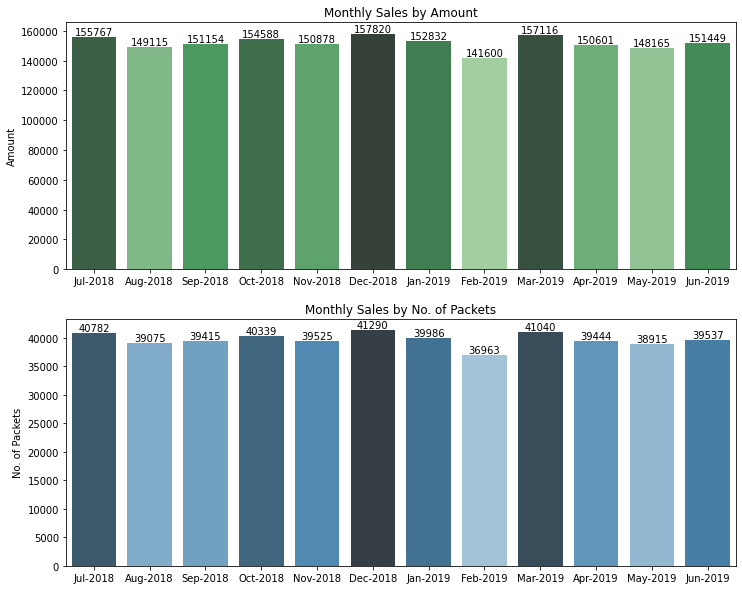

In [14]:
fig, ax =plt.subplots(2,1,figsize=(12,10))

ax[0].set_title('Monthly Sales by Amount',fontsize=12)
sns.barplot(y=sales_monthly['TOT_SALES'], x=sales_monthly['MON_YR'], palette='Greens_d',hue=sales_monthly['TOT_SALES'],
            order=order_monyr, ax=ax[0], dodge=False)
ax[0].set(xlabel="",ylabel="Amount")
ax[0].legend_.remove()
# set the bar labels 
for i in ax[0].containers:
    ax[0].bar_label(i,)

    
ax[1].set_title('Monthly Sales by No. of Packets',fontsize=12)
sns.barplot(y=sales_monthly['PROD_QTY'],x=sales_monthly['MON_YR'], palette='Blues_d',hue=sales_monthly['PROD_QTY'],
            order=order_monyr, ax=ax[1], dodge=False)
ax[1].set(xlabel="",ylabel="No. of Packets")
ax[1].legend_.remove()
# set the bar labels 
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlySales.jpeg',bbox_inches='tight')
plt.show()

In [15]:
sales_yearly = sales_monthly.groupby(['YEAR']).agg({'PROD_QTY':'sum','TOT_SALES':'sum'}).reset_index()
sales_yearly.head()

,YEAR,PROD_QTY,TOT_SALES
0,2018,240426.0,919321.15
1,2019,235885.0,901763.25


Plot yearly sales figures

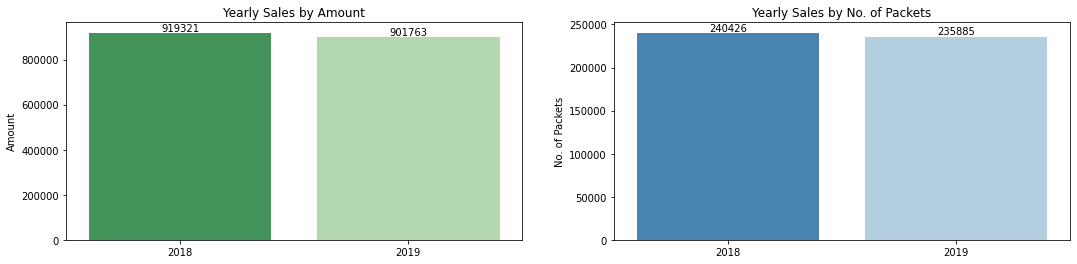

In [152]:
fig, ax =plt.subplots(1,2,figsize=(18,4))

ax[0].set_title('Yearly Sales by Amount',fontsize=12)
sns.barplot(y=sales_yearly['TOT_SALES'], x=sales_yearly['YEAR'], palette='Greens',hue=sales_yearly['TOT_SALES'],
            ax=ax[0], dodge=False)
ax[0].set(xlabel="",ylabel="Amount")
ax[0].legend_.remove()
# set the bar labels 
for i in ax[0].containers:
    ax[0].bar_label(i,)

    
ax[1].set_title('Yearly Sales by No. of Packets',fontsize=12)
sns.barplot(y=sales_yearly['PROD_QTY'],x=sales_yearly['YEAR'], palette='Blues',hue=sales_yearly['PROD_QTY'],
            ax=ax[1], dodge=False)
ax[1].set(xlabel="",ylabel="No. of Packets")
ax[1].legend_.remove()
# set the bar labels 
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
plt.savefig('D:\\ProjectQuantium\\Plots\\YearlySales.jpeg',bbox_inches='tight')
plt.show()

##  <br /> <br />  2. Analysis by Chips Brands

In [153]:
tc_df.columns

Index(['DATE', 'YEAR', 'MONTH', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID',
       'PROD_NBR', 'PROD_NAME', 'PROD_BRAND', 'PROD_WEIGHT', 'PROD_QTY',
       'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

Group by Product No., Product Name, Product Brand and Product Weight and find sum of quantity and sales amount

In [154]:
sales_brands = tc_df.groupby(['PROD_NBR','PROD_NAME',
                              'PROD_BRAND','PROD_WEIGHT']).agg({'PROD_QTY':'sum','TOT_SALES':'sum'}).reset_index()

In [155]:
sales_brands.head()

,PROD_NBR,PROD_NAME,PROD_BRAND,PROD_WEIGHT,PROD_QTY,TOT_SALES
0,1.0,Smiths Crinkle Cut Chips Barbecue 170g,Smiths,170g,2802.0,8125.8
1,2.0,Cobs Popd Sour Crm &Chives Chips 110g,Cobs,110g,6038.0,22944.4
2,3.0,Kettle Sensations Camembert & Fig 150g,Kettle,150g,6157.0,28308.4
3,4.0,Dorito Corn Chp Supreme 380g,Doritos,380g,6509.0,40352.0
4,5.0,Natural Chip Compny SeaSalt175g,NCC,175g,2777.0,8331.0


In [156]:
sb1=sales_brands[['PROD_NBR','PROD_NAME','TOT_SALES']].sort_values('TOT_SALES',ascending=False).reset_index(drop=True)
sb1.head(10)

,PROD_NBR,PROD_NAME,TOT_SALES
0,4.0,Dorito Corn Chp Supreme 380g,40352.0
1,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
2,16.0,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
3,102.0,Kettle Mozzarella Basil & Pesto 175g,34457.4
4,7.0,Smiths Crinkle Original 330g,34302.6
5,23.0,Cheezels Cheese 330g,34296.9
6,20.0,Doritos Cheese Supreme 330g,33390.6
7,89.0,Kettle Sweet Chilli And Sour Cream 175g,33031.8
8,46.0,Kettle Original 175g,32740.2
9,32.0,Kettle Sea Salt And Vinegar 175g,32589.0


In [157]:
print(sb1['TOT_SALES'].min())
print(sb1['TOT_SALES'].max())

4532.2
40352.0


In [158]:
sb2=sales_brands[['PROD_NBR','PROD_NAME','PROD_QTY']].sort_values('PROD_QTY',ascending=False).reset_index(drop=True)
sb2.head(10)

,PROD_NBR,PROD_NAME,PROD_QTY
0,4.0,Dorito Corn Chp Supreme 380g,6509.0
1,102.0,Kettle Mozzarella Basil & Pesto 175g,6381.0
2,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309.0
3,75.0,Cobs Popd Sea Salt Chips 110g,6277.0
4,33.0,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256.0
5,74.0,Tostitos Splash Of Lime 175g,6234.0
6,112.0,Tyrrells Crisps Ched & Chives 165g,6227.0
7,63.0,Kettle 135g Swt Pot Sea Salt,6212.0
8,104.0,Infuzions Thai SweetChili PotatoMix 110g,6206.0
9,28.0,Thins Potato Chips Hot & Spicy 175g,6185.0


In [159]:
print(sb2['PROD_QTY'].min())
print(sb2['PROD_QTY'].max())

2643.0
6509.0


Plot top and bottom 10 selling products by amount of sales

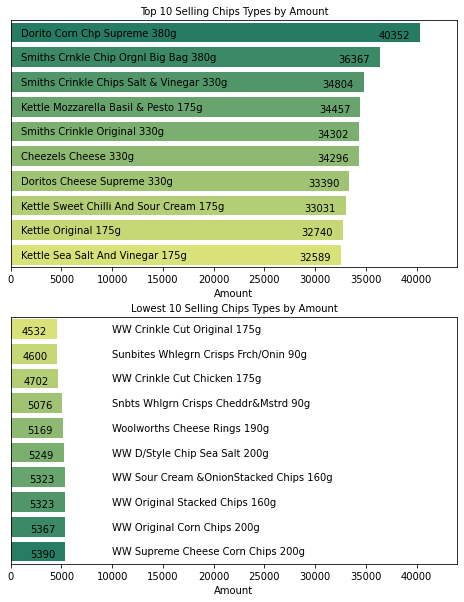

In [160]:
fig, ax =plt.subplots(2,1,figsize=(8,10))

ax[0].set_title('Top 10 Selling Chips Types by Amount',fontsize=10)
df1=sb1.head(10)
ax[0] = sns.barplot(data=df1, x='TOT_SALES', y=df1.index, orient='h',palette="summer",ax=ax[0],dodge=False)
ax[0].set(xlabel="Amount",ylabel="")
ax[0].get_yaxis().set_visible(False)
# write messages on bars
for bar, msg in zip(ax[0].patches, df1['PROD_NAME']):
     ax[0].text(1000, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')
# set the bar labels
for p in ax[0].patches:
    ax[0].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-10,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right') 
ax[0].set_xlim(0,44000)

    
ax[1].set_title('Lowest 10 Selling Chips Types by Amount',fontsize=10)
df2=sb1.tail(10).sort_values('TOT_SALES',ascending=True).reset_index(drop=True)
ax[1] = sns.barplot(data=df2, x='TOT_SALES', y=df2.index, orient='h',palette="summer_r",ax=ax[1],dodge=False)
ax[1].set(xlabel="Amount",ylabel="")
ax[1].get_yaxis().set_visible(False)
# write messages on bars
for bar, msg2 in zip(ax[1].patches, df2['PROD_NAME']):
     ax[1].text(10000, bar.get_y()+bar.get_height()/2, msg2, color='black', ha='left', va='center')
# set the bar labels
for p in ax[1].patches:
    ax[1].annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-10,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right')
ax[1].set_xlim(0,44000)

plt.savefig('D:\\ProjectQuantium\\Plots\\BrandSales_byAmount.jpeg',bbox_inches='tight')
plt.show()

Plot top and bottom 10 selling products by number of packages

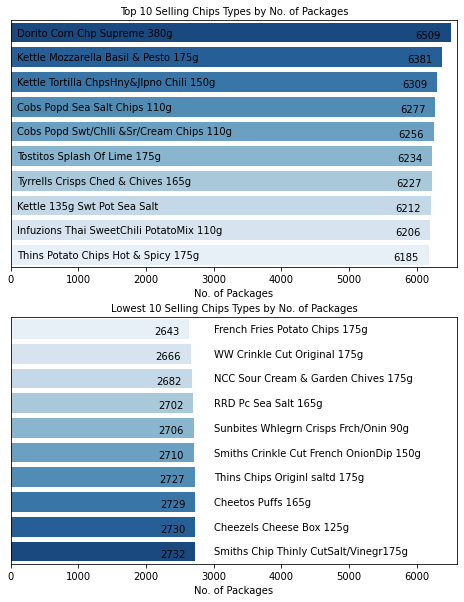

In [161]:
fig, ax =plt.subplots(2,1,figsize=(8,10))

ax[0].set_title('Top 10 Selling Chips Types by No. of Packages',fontsize=10)
df1=sb2.head(10)
ax[0] = sns.barplot(data=df1, x='PROD_QTY', y=df1.index, orient='h',palette="Blues_r",ax=ax[0],dodge=False)
ax[0].set(xlabel="No. of Packages",ylabel="")
ax[0].get_yaxis().set_visible(False)
# write messages on bars
for bar, msg in zip(ax[0].patches, df1['PROD_NAME']):
     ax[0].text(100, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')
# set the bar labels
for p in ax[0].patches:
    ax[0].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-10,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right') 
ax[0].set_xlim(0,6600)

    
ax[1].set_title('Lowest 10 Selling Chips Types by No. of Packages',fontsize=10)
df2=sb2.tail(10).sort_values('PROD_QTY',ascending=True).reset_index(drop=True)
ax[1] = sns.barplot(data=df2, x='PROD_QTY', y=df2.index, orient='h',palette="Blues",ax=ax[1],dodge=False)
ax[1].set(xlabel="No. of Packages",ylabel="")
ax[1].get_yaxis().set_visible(False)
# write messages on bars
for bar, msg2 in zip(ax[1].patches, df2['PROD_NAME']):
     ax[1].text(3000, bar.get_y()+bar.get_height()/2, msg2, color='black', ha='left', va='center')
# set the bar labels
for p in ax[1].patches:
    ax[1].annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-10,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right')
ax[1].set_xlim(0,6600)

plt.savefig('D:\\ProjectQuantium\\Plots\\BrandSales_byNumbers.jpeg',bbox_inches='tight')
plt.show()

Group by Product Brand and find sum of quantity and sales amount

In [164]:
sb3=sales_brands.groupby(['PROD_BRAND']).agg({'PROD_QTY':'sum','TOT_SALES':'sum'}).reset_index()

In [165]:
sb3.head()

,PROD_BRAND,PROD_QTY,TOT_SALES
0,Burger,2970.0,6831.0
1,CCs,8609.0,18078.9
2,Cheetos,5530.0,16884.5
3,Cheezels,8747.0,40029.9
4,Cobs,18571.0,70569.8


Compute percentage of Sales Amount and Quantity Sold for each brand

In [166]:
sb3['SALES%'] = 0
sb3['QTY%'] = 0

for i in range(len(sb3)):
    sb3['SALES%'][i] = (sb3['TOT_SALES'][i]/sb3['TOT_SALES'].sum())*100
    sb3['SALES%'][i] = sb3['SALES%'][i].round(1).astype(str) + '%'
    sb3['QTY%'][i] = (sb3['PROD_QTY'][i]/sb3['PROD_QTY'].sum())*100
    sb3['QTY%'][i] = sb3['QTY%'][i].round(1).astype(str) + '%'

<ipython-input-166-5d464a24326c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb3['SALES%'][i] = (sb3['TOT_SALES'][i]/sb3['TOT_SALES'].sum())*100
<ipython-input-166-5d464a24326c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb3['QTY%'][i] = (sb3['PROD_QTY'][i]/sb3['PROD_QTY'].sum())*100


In [167]:
sb3.head()

,PROD_BRAND,PROD_QTY,TOT_SALES,SALES%,QTY%
0,Burger,2970.0,6831.0,0.4%,0.6%
1,CCs,8609.0,18078.9,1.0%,1.8%
2,Cheetos,5530.0,16884.5,0.9%,1.2%
3,Cheezels,8747.0,40029.9,2.2%,1.8%
4,Cobs,18571.0,70569.8,3.9%,3.9%


Plot Sales Amount by Brand

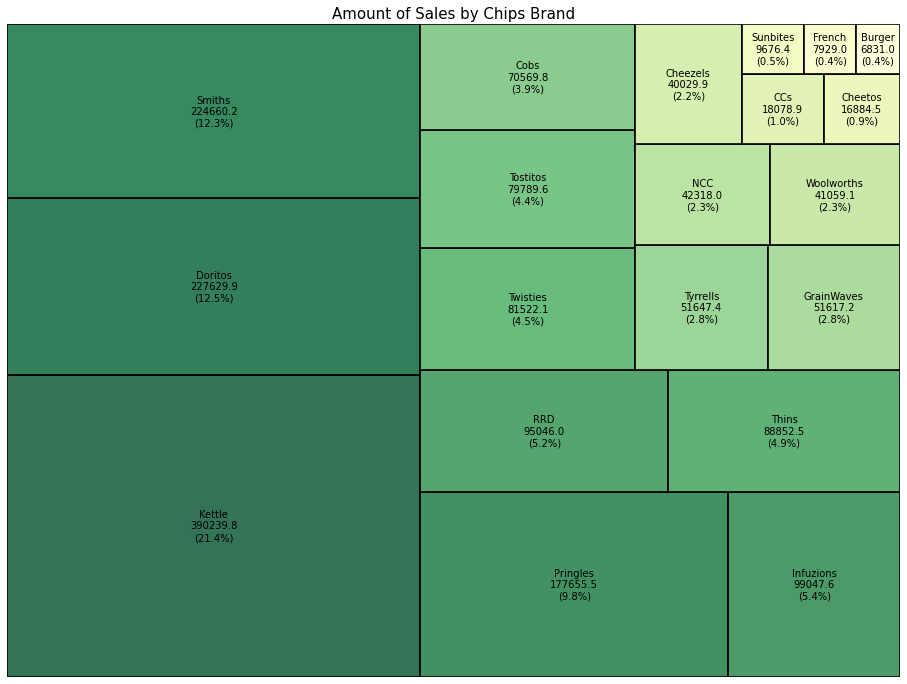

In [168]:
plt.figure(figsize=(16,12))

plt.axis("off")
df1 = sb3.sort_values('TOT_SALES',ascending=False)

lbl = df1['PROD_BRAND']+ '\n' + df1['TOT_SALES'].round(1).astype(str) + '\n' + '('+df1['SALES%']+')'

axis = squarify.plot(sizes = df1['TOT_SALES'], 
                     label = lbl,
                     text_kwargs = {'fontsize': 10},
                     bar_kwargs = dict(linewidth=2, edgecolor="black"),
                     color = sns.color_palette("YlGn_r", len(df1['PROD_BRAND'])),
                     alpha = 0.8)

axis.set_title("Amount of Sales by Chips Brand", fontsize=15)

plt.savefig('D:\\ProjectQuantium\\Plots\\BrandSalesTree_byAmount.jpeg',bbox_inches='tight')
plt.show()

Plot Quantity Sold by Brand

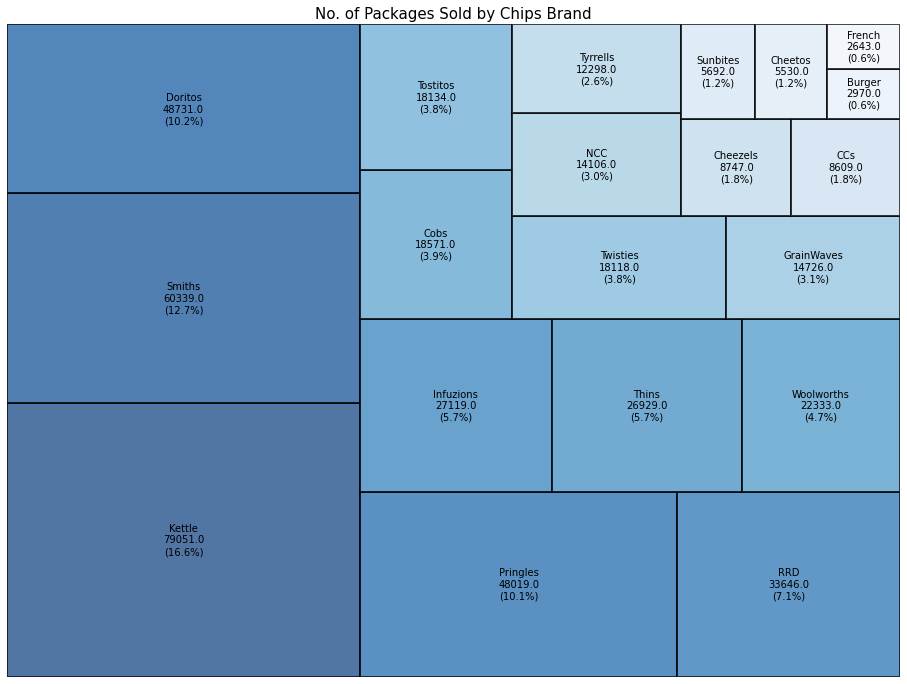

In [169]:
plt.figure(figsize=(16,12))

plt.axis("off")
df2 = sb3.sort_values('PROD_QTY',ascending=False)

lbl = df2['PROD_BRAND']+ '\n' + df2['PROD_QTY'].round(1).astype(str) + '\n' + '('+df2['QTY%']+')'

axis = squarify.plot(sizes = df2['PROD_QTY'], 
                     label = lbl,
                     text_kwargs = {'fontsize': 10},
                     bar_kwargs = dict(linewidth=2, edgecolor="black"),
                     color = sns.color_palette("Blues_r", len(df2['PROD_BRAND'])),
                     alpha = 0.7)

axis.set_title("No. of Packages Sold by Chips Brand", fontsize=15)

plt.savefig('D:\\ProjectQuantium\\Plots\\BrandSalesTree_byNumbers.jpeg',bbox_inches='tight')
plt.show()

Compute price of one package of each unique product

In [170]:
sales_brands['PRICE_PER_PKG'] = sales_brands['TOT_SALES']/sales_brands['PROD_QTY']
sales_brands['PRICE_PER_PKG'] = sales_brands['PRICE_PER_PKG'].round(decimals=2)

In [171]:
sales_brands.head()

,PROD_NBR,PROD_NAME,PROD_BRAND,PROD_WEIGHT,PROD_QTY,TOT_SALES,PRICE_PER_PKG
0,1.0,Smiths Crinkle Cut Chips Barbecue 170g,Smiths,170g,2802.0,8125.8,2.9
1,2.0,Cobs Popd Sour Crm &Chives Chips 110g,Cobs,110g,6038.0,22944.4,3.8
2,3.0,Kettle Sensations Camembert & Fig 150g,Kettle,150g,6157.0,28308.4,4.6
3,4.0,Dorito Corn Chp Supreme 380g,Doritos,380g,6509.0,40352.0,6.2
4,5.0,Natural Chip Compny SeaSalt175g,NCC,175g,2777.0,8331.0,3.0


In [172]:
sales_brands['PRICE_PER_PKG'].min()

1.7

In [173]:
sales_brands['PRICE_PER_PKG'].max()

6.2

In [174]:
sales_brands['PRICE_PER_PKG'].median()

3.3

Plot relation between price per package and net sales and quantity sold

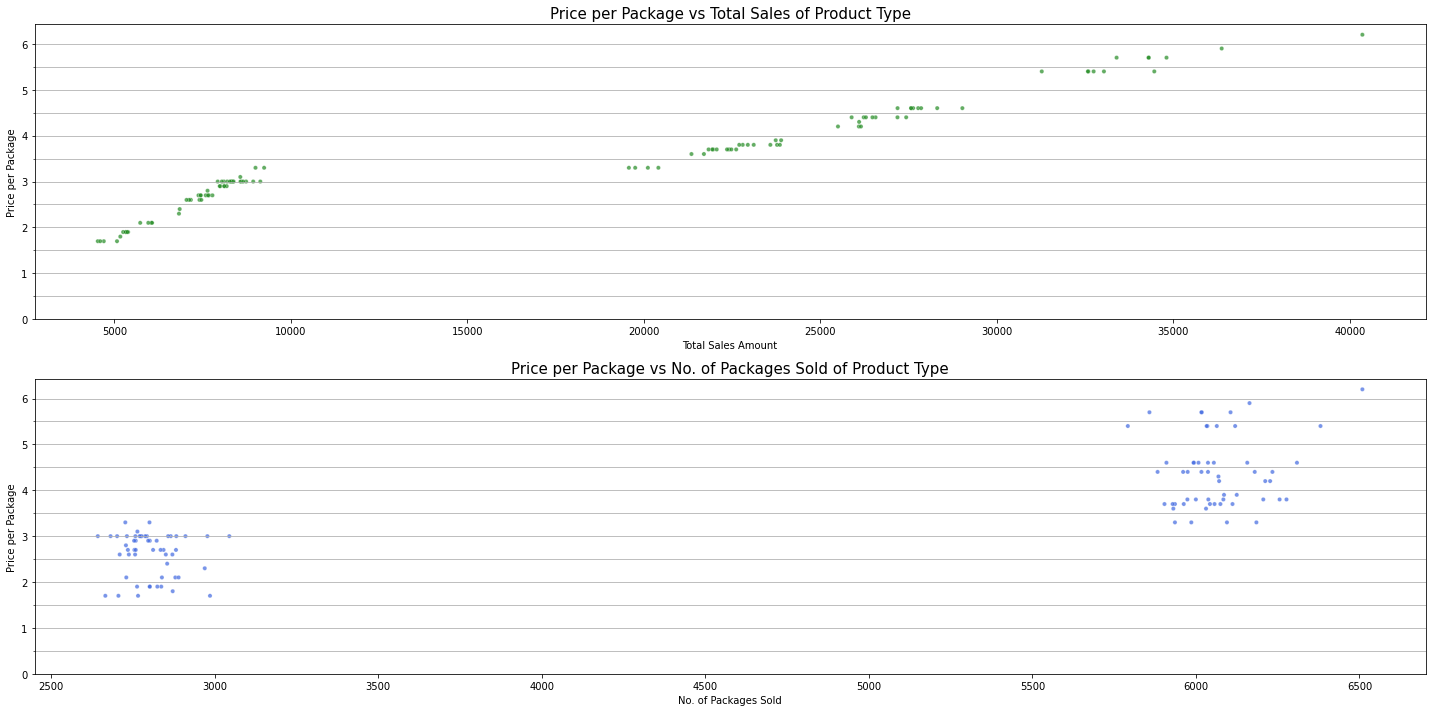

In [175]:
fig, ax =plt.subplots(2,1,figsize=(20,10))

ax[0].set_title('Price per Package vs Total Sales of Product Type', fontsize=15)
sns.scatterplot(data=sales_brands, y='PRICE_PER_PKG', x='TOT_SALES', size=5, alpha=0.7, color='forestgreen', ax=ax[0])
ax[0].set(ylabel="Price per Package", xlabel="Total Sales Amount")
ax[0].legend().set_visible(False)
ax[0].set_yticks(np.arange(0, 6, 0.5), minor=True)
ax[0].yaxis.grid(which='both')

ax[1].set_title('Price per Package vs No. of Packages Sold of Product Type', fontsize=15)
sns.scatterplot(data=sales_brands, y='PRICE_PER_PKG', x='PROD_QTY', size=5, alpha=0.7, color='royalblue', ax=ax[1])
ax[1].set(ylabel="Price per Package", xlabel="No. of Packages Sold")
ax[1].legend().set_visible(False)
ax[1].set_yticks(np.arange(0, 6, 0.5), minor=True)
ax[1].yaxis.grid(which='both')

plt.tight_layout()

plt.savefig('D:\\ProjectQuantium\\Plots\\Priceperpkg_byNumbers&Amount.jpeg',bbox_inches='tight')
plt.show()

In [176]:
sb3.sort_values('TOT_SALES',ascending=False)['PROD_BRAND']

9         Kettle
5        Doritos
13        Smiths
11      Pringles
8      Infuzions
12           RRD
15         Thins
17      Twisties
16      Tostitos
4           Cobs
18      Tyrrells
7     GrainWaves
10           NCC
19    Woolworths
3       Cheezels
1            CCs
2        Cheetos
14      Sunbites
6         French
0         Burger
Name: PROD_BRAND, dtype: object

Plot distribution of prices per package for each brand

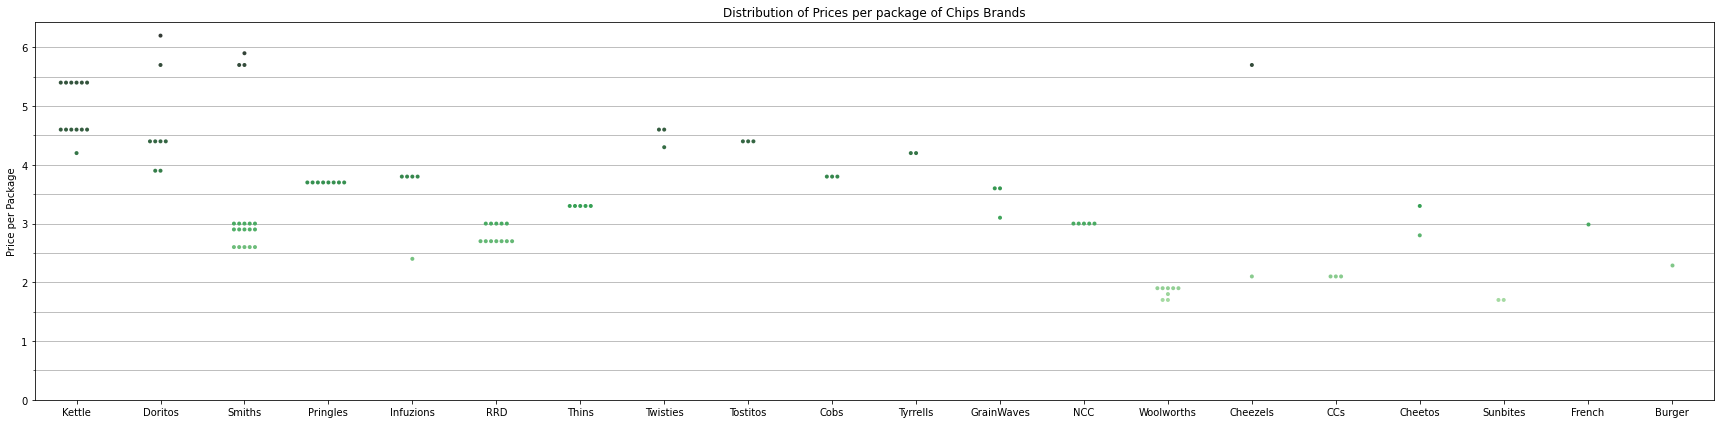

In [177]:
plt.figure(figsize=(24,6))

ax=sns.swarmplot(data=sales_brands, y='PRICE_PER_PKG', x='PROD_BRAND',size=4, hue='PRICE_PER_PKG', palette="Greens_d",
             order=sb3.sort_values('TOT_SALES',ascending=False)['PROD_BRAND'] )
plt.title('Distribution of Prices per package of Chips Brands',fontsize=12)
plt.xlabel("")
plt.ylabel('Price per Package',fontsize=10)
plt.legend().set_visible(False)
ax.set_yticks(np.arange(0, 6, 0.5), minor=True)
ax.yaxis.grid(which='both')

plt.tight_layout()
plt.savefig('D:\\ProjectQuantium\\Plots\\Priceperpkg_byBrands.jpeg',bbox_inches='tight')
plt.show()

##  <br /> <br />  3. Analysis by Package Weight

Group by Package Weight and find sum of quantity and sales amount

In [178]:
sb4=sales_brands.groupby(['PROD_WEIGHT']).agg({'PROD_QTY':'sum','TOT_SALES':'sum'}).reset_index()
sb4.head()

,PROD_WEIGHT,PROD_QTY,TOT_SALES
0,70g,2855.0,6852.0
1,90g,5692.0,9676.4
2,110g,42835.0,162765.4
3,125g,2730.0,5733.0
4,134g,48019.0,177655.5


Compute percentage of sales amount and quantity sold for each unique weight

In [179]:
sb4['SALES%'] = 0
sb4['QTY%'] = 0

for i in range(len(sb4)):
    sb4['SALES%'][i] = (sb4['TOT_SALES'][i]/sb4['TOT_SALES'].sum())*100
    sb4['SALES%'][i] = sb4['SALES%'][i].round(1).astype(str) + '%'
    sb4['QTY%'][i] = (sb4['PROD_QTY'][i]/sb4['PROD_QTY'].sum())*100
    sb4['QTY%'][i] = sb4['QTY%'][i].round(1).astype(str) + '%'

<ipython-input-179-09192cb32f4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb4['SALES%'][i] = (sb4['TOT_SALES'][i]/sb4['TOT_SALES'].sum())*100
<ipython-input-179-09192cb32f4f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb4['QTY%'][i] = (sb4['PROD_QTY'][i]/sb4['PROD_QTY'].sum())*100


In [180]:
sb4.head()

,PROD_WEIGHT,PROD_QTY,TOT_SALES,SALES%,QTY%
0,70g,2855.0,6852.0,0.4%,0.6%
1,90g,5692.0,9676.4,0.5%,1.2%
2,110g,42835.0,162765.4,8.9%,9.0%
3,125g,2730.0,5733.0,0.3%,0.6%
4,134g,48019.0,177655.5,9.8%,10.1%


Plot Sales Amount by Package Weight

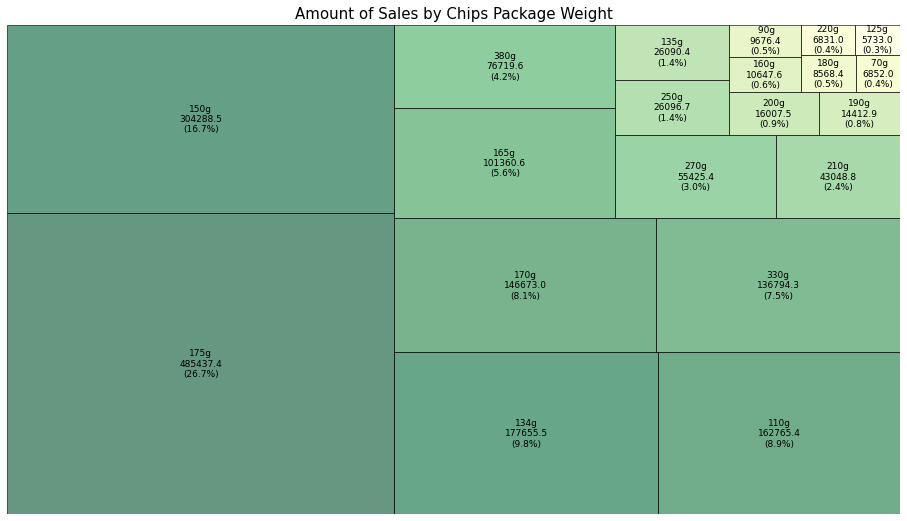

In [181]:
plt.figure(figsize=(16,9))

plt.axis("off")
df1 = sb4.sort_values('TOT_SALES',ascending=False)

lbl = df1['PROD_WEIGHT']+ '\n' + df1['TOT_SALES'].round(1).astype(str) + '\n' + '('+df1['SALES%']+')'

axis = squarify.plot(sizes = df1['TOT_SALES'], 
                     label = lbl,
                     text_kwargs = {'fontsize': 9},
                     bar_kwargs = dict(linewidth=1, edgecolor="black"),
                     color = sns.color_palette("YlGn_r", len(df1['PROD_WEIGHT'])),
                     alpha = 0.6)

axis.set_title("Amount of Sales by Chips Package Weight", fontsize=15)

plt.savefig('D:\\ProjectQuantium\\Plots\\PkgwtSalesTree_byAmount.jpeg',bbox_inches='tight')
plt.show()

Plot Quantity Sold by Package Weight

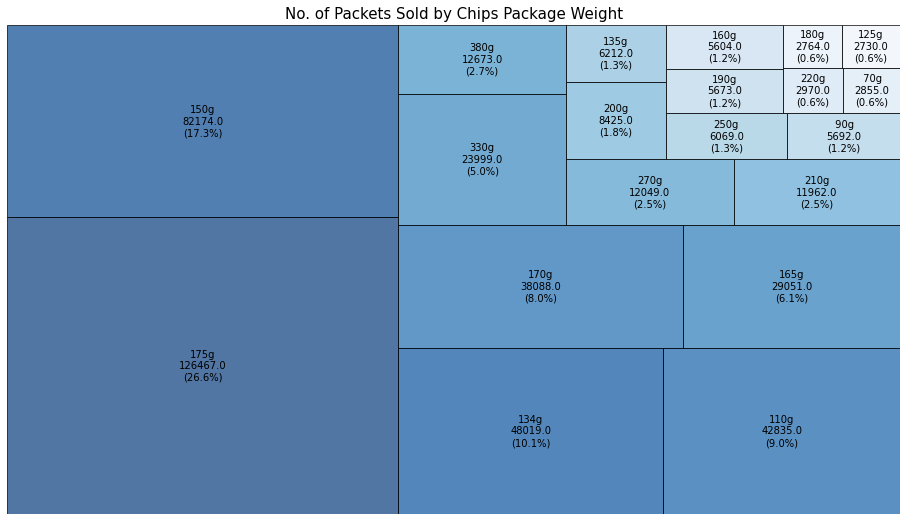

In [182]:
plt.figure(figsize=(16,9))

plt.axis("off")
df2 = sb4.sort_values('PROD_QTY',ascending=False)

lbl = df2['PROD_WEIGHT']+ '\n' + df2['PROD_QTY'].round(1).astype(str) + '\n' + '('+df2['QTY%']+')'

axis = squarify.plot(sizes = df2['PROD_QTY'], 
                     label = lbl,
                     text_kwargs = {'fontsize': 10},
                     bar_kwargs = dict(linewidth=1, edgecolor="black"),
                     color = sns.color_palette("Blues_r", len(df2['PROD_WEIGHT'])),
                     alpha = 0.7)

axis.set_title("No. of Packets Sold by Chips Package Weight", fontsize=15)

plt.savefig('D:\\ProjectQuantium\\Plots\\PkgwtSalesTree_byNumbers.jpeg',bbox_inches='tight')
plt.show()

## <br /><br /> 4. Analysis by Stores

In [183]:
tc_df.head()

,DATE,YEAR,MONTH,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_BRAND,PROD_WEIGHT,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,2018.0,Oct,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,NCC,175g,2.0,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,2019.0,May,1.0,1307,348.0,66.0,CCs Nacho Cheese 175g,CCs,175g,3.0,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,2018.0,Nov,1.0,1307,346.0,96.0,WW Original Stacked Chips 160g,Woolworths,160g,2.0,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,2019.0,Mar,1.0,1307,347.0,54.0,CCs Original 175g,CCs,175g,1.0,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,2019.0,May,1.0,1343,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,Smiths,170g,2.0,2.9,MIDAGE SINGLES/COUPLES,Budget


Group by Store Number and find customer count of each store

In [184]:
str1 = tc_df[['STORE_NBR','LYLTY_CARD_NBR']].drop_duplicates().groupby('STORE_NBR').size().reset_index(name='NO_OF_CUST')
str1['STORE_NBR'] = str1['STORE_NBR'].astype('category')
str1.head()

,STORE_NBR,NO_OF_CUST
0,1.0,335
1,2.0,302
2,3.0,362
3,4.0,378
4,5.0,237


In [185]:
str1['NO_OF_CUST'].max()

395

In [186]:
str1.NO_OF_CUST.median()

272.0

Plot distribution of Customer Numbers in Stores

<Figure size 360x360 with 0 Axes>

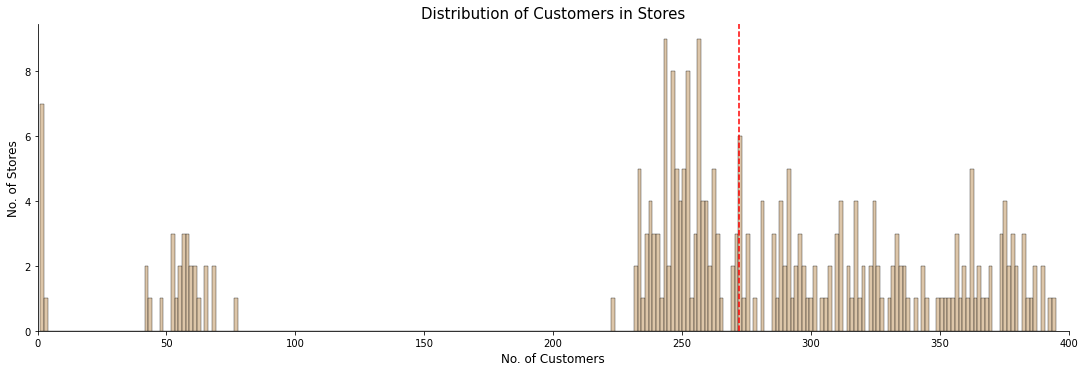

In [187]:
plt.figure(figsize=(5,5))

sns.displot(data=str1, x='NO_OF_CUST', color='tan', bins=272, multiple='stack', aspect=3)
plt.title('Distribution of Customers in Stores',fontsize=15)
plt.xlabel('No. of Customers',fontsize=12)
plt.ylabel('No. of Stores',fontsize=12)
plt.xlim(0,400)

plt.axvline(x=str1.NO_OF_CUST.median(),color='red',ls='--',lw=1.5)

plt.savefig('D:\\ProjectQuantium\\Plots\\Store_cust_hist.jpeg',bbox_inches='tight')
plt.show()

In [188]:
str1['CUST_RANGE'] = np.nan

for i in range(len(str1)):
    if str1['NO_OF_CUST'][i] < 100:
        str1['CUST_RANGE'][i] = "Less than 100 customers"
    elif str1['NO_OF_CUST'][i] >= 100 and str1['NO_OF_CUST'][i] <= 300:
        str1['CUST_RANGE'][i] = "Between 100 and 300 customers"
    else:
        str1['CUST_RANGE'][i] = "More than 300 customers"

<ipython-input-188-3f4a050b4fbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str1['CUST_RANGE'][i] = "More than 300 customers"


In [189]:
str1.head()

,STORE_NBR,NO_OF_CUST,CUST_RANGE
0,1.0,335,More than 300 customers
1,2.0,302,More than 300 customers
2,3.0,362,More than 300 customers
3,4.0,378,More than 300 customers
4,5.0,237,Between 100 and 300 customers


In [190]:
str1['CUST_RANGE'].value_counts()

Between 100 and 300 customers    141
More than 300 customers           96
Less than 100 customers           34
Name: CUST_RANGE, dtype: int64

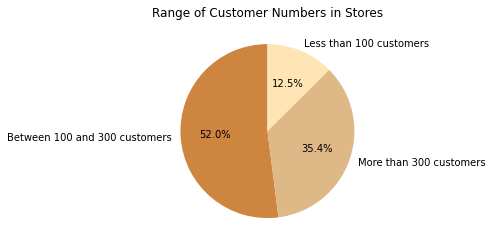

In [191]:
plt.figure(figsize=(4, 4))
plt.title('Range of Customer Numbers in Stores')
str1['CUST_RANGE'].value_counts().plot.pie(autopct="%.1f%%",startangle=90,colors=['peru','burlywood','moccasin'])
plt.ylabel('')

plt.savefig('D:\\ProjectQuantium\\Plots\\Store_custrange.jpeg',bbox_inches='tight')
plt.show()

Plot Top and Bottom 10 Stores ordered by Customer Numbers

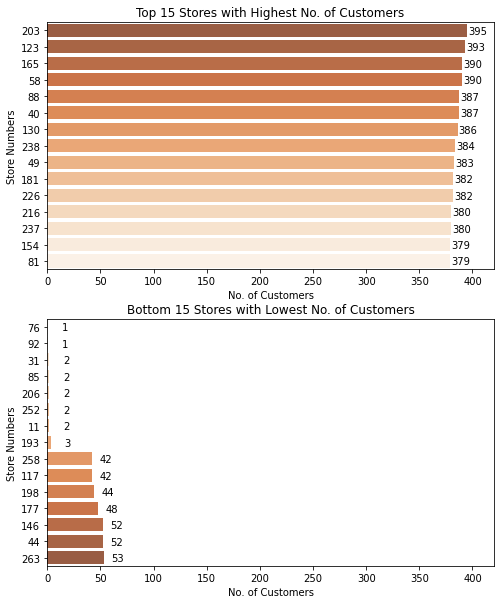

In [197]:
fig, ax =plt.subplots(2,1,figsize=(8,10))

ax[0].set_title('Top 15 Stores with Highest No. of Customers',fontsize=12)
df1=str1.sort_values('NO_OF_CUST',ascending=False).reset_index(drop=True).head(15)
ax[0] = sns.barplot(data=df1, x='NO_OF_CUST', y=df1.index, orient='h',palette="Oranges_r",alpha=0.8,ax=ax[0],dodge=False)
ax[0].set(xlabel="No. of Customers",ylabel="Store Numbers")
ax[0].set_yticklabels(df1['STORE_NBR'].astype('Int64'))
# set the bar labels
for p in ax[0].patches:
    ax[0].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right') 
ax[0].set_xlim(0,420)


ax[1].set_title('Bottom 15 Stores with Lowest No. of Customers',fontsize=12)
df2=str1.sort_values('NO_OF_CUST',ascending=True).reset_index(drop=True).head(15)
ax[1] = sns.barplot(data=df2, x='NO_OF_CUST', y=df2.index, orient='h',palette="Oranges",alpha=0.8,ax=ax[1],dodge=False)
ax[1].set(xlabel="No. of Customers",ylabel="Store Numbers")
ax[1].set_yticklabels(df2['STORE_NBR'].astype('Int64'))
# set the bar labels
for p in ax[1].patches:
    ax[1].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right') 
ax[1].set_xlim(0,420)

plt.savefig('D:\\ProjectQuantium\\Plots\\Stores_byCust.jpeg',bbox_inches='tight')
plt.show()

Group by Store Number and find sum of quantity and sales amount

In [200]:
str2 = tc_df[['STORE_NBR','PROD_QTY','TOT_SALES']].groupby('STORE_NBR').agg({'PROD_QTY':'sum','TOT_SALES':'sum'}).reset_index()
str2['STORE_NBR'] = str2['STORE_NBR'].astype('Int64')
str2.head()

,STORE_NBR,PROD_QTY,TOT_SALES
0,1,659.0,2237.30
1,2,531.0,1885.90
2,3,2784.0,12149.65
3,4,3132.0,13709.25
4,5,2542.0,8926.70


In [201]:
str2['PROD_QTY'].max()

4193.0

In [202]:
str2['TOT_SALES'].max()

17844.65

In [203]:
str2.PROD_QTY.median()

1302.0

In [204]:
str2.TOT_SALES.median()

5663.5

Plot distribution of Packages Sold in Stores

<Figure size 360x360 with 0 Axes>

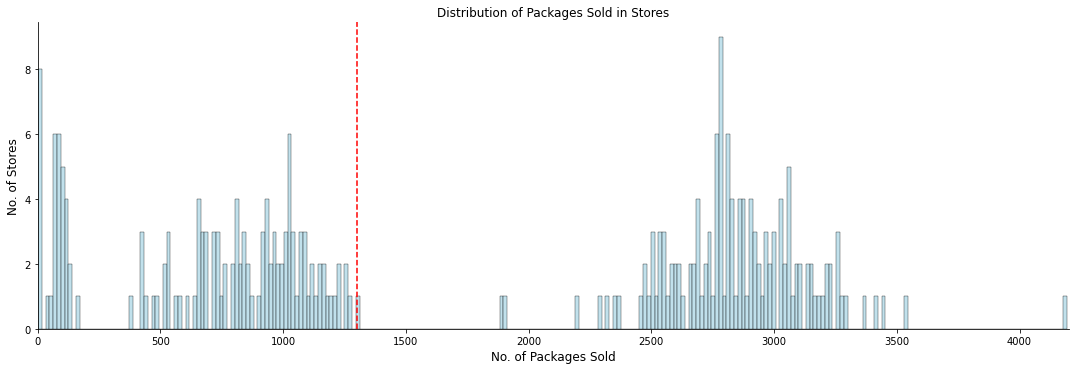

In [205]:
plt.figure(figsize=(5,5))

sns.displot(data=str2,x='PROD_QTY',color='lightblue',bins=272,multiple='stack',aspect=3)
plt.title('Distribution of Packages Sold in Stores',fontsize=12)
plt.xlabel('No. of Packages Sold',fontsize=12)
plt.ylabel('No. of Stores',fontsize=12)
plt.xlim(0,4200)

plt.axvline(x=str2.PROD_QTY.median(),color='red',ls='--',lw=1.5)

plt.savefig('D:\\ProjectQuantium\\Plots\\Store_pkgno_hist.jpeg',bbox_inches='tight')
plt.show()

In [206]:
str2['QTY_RANGE'] = np.nan

for i in range(len(str2)):
    if str2['PROD_QTY'][i] < 500:
        str2['QTY_RANGE'][i] = "Less than 500 packages sold"
    elif str2['PROD_QTY'][i] >= 500 and str2['PROD_QTY'][i] <= 2000:
        str2['QTY_RANGE'][i] = "Between 500 and 2000 packages sold"
    else:
        str2['QTY_RANGE'][i] = "More than 2000 packages sold"

<ipython-input-206-c632d20b95a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str2['QTY_RANGE'][i] = "Between 500 and 2000 packages sold"


In [207]:
str2['QTY_RANGE'].value_counts()

More than 2000 packages sold          133
Between 500 and 2000 packages sold     97
Less than 500 packages sold            41
Name: QTY_RANGE, dtype: int64

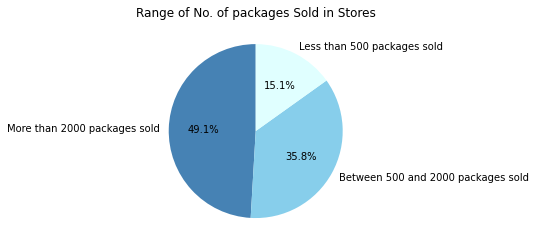

In [208]:
plt.figure(figsize=(4, 4))
plt.title('Range of No. of packages Sold in Stores')
str2['QTY_RANGE'].value_counts().plot.pie(autopct="%.1f%%",startangle=90,colors=['steelblue','skyblue','lightcyan'])
plt.ylabel('')

plt.savefig('D:\\ProjectQuantium\\Plots\\Store_pkgrange.jpeg',bbox_inches='tight')
plt.show()

Plot Amount of Sales in Stores

<Figure size 360x360 with 0 Axes>

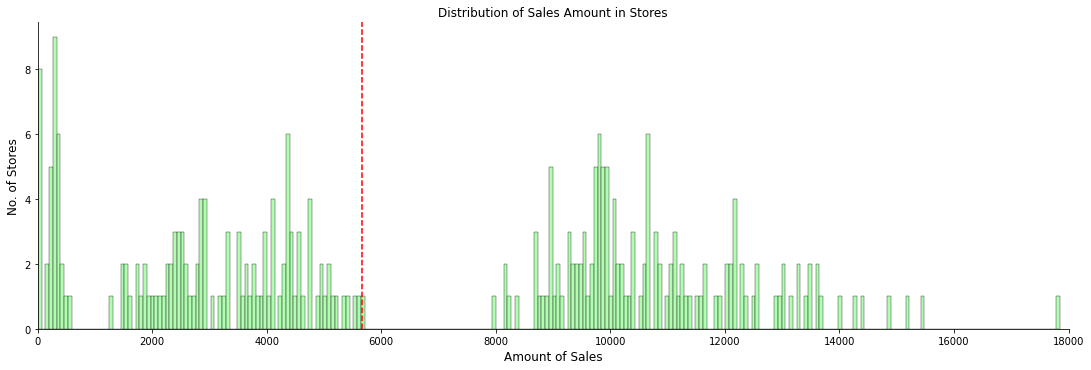

In [209]:
plt.figure(figsize=(5,5))

sns.displot(data=str2,x='TOT_SALES',color='palegreen',bins=272,multiple='stack',aspect=3)
plt.title('Distribution of Sales Amount in Stores',fontsize=12)
plt.xlabel('Amount of Sales',fontsize=12)
plt.ylabel('No. of Stores',fontsize=12)
plt.xlim(0,18000)

plt.axvline(x=str2.TOT_SALES.median(),color='red',ls='--',lw=1.5)

plt.savefig('D:\\ProjectQuantium\\Plots\\Store_sales_hist.jpeg',bbox_inches='tight')
plt.show()

In [210]:
str2['SALES_RANGE'] = np.nan

for i in range(len(str2)):
    if str2['TOT_SALES'][i] < 2000:
        str2['SALES_RANGE'][i] = "Sales less than 2000"
    elif str2['TOT_SALES'][i] >= 2000 and str2['TOT_SALES'][i] <= 10000:
        str2['SALES_RANGE'][i] = "Sales between 2000 and 10000"
    else:
        str2['SALES_RANGE'][i] = "Sales more than 10000"

<ipython-input-210-626191c5d2e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str2['SALES_RANGE'][i] = "Sales between 2000 and 10000"


In [211]:
str2['SALES_RANGE'].value_counts()

Sales between 2000 and 10000    146
Sales more than 10000            79
Sales less than 2000             46
Name: SALES_RANGE, dtype: int64

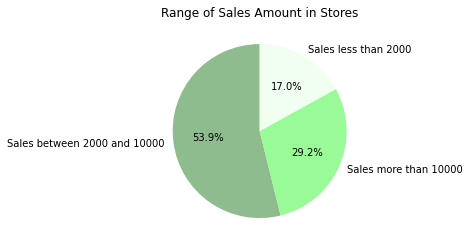

In [212]:
plt.figure(figsize=(4, 4))
plt.title('Range of Sales Amount in Stores')
str2['SALES_RANGE'].value_counts().plot.pie(autopct="%.1f%%",startangle=90,colors=['darkseagreen','palegreen','honeydew'])
plt.ylabel('')

plt.savefig('D:\\ProjectQuantium\\Plots\\Store_salesrange.jpeg',bbox_inches='tight')
plt.show()

Plot top and bottom 20 stores by Quantity and Sales Amount

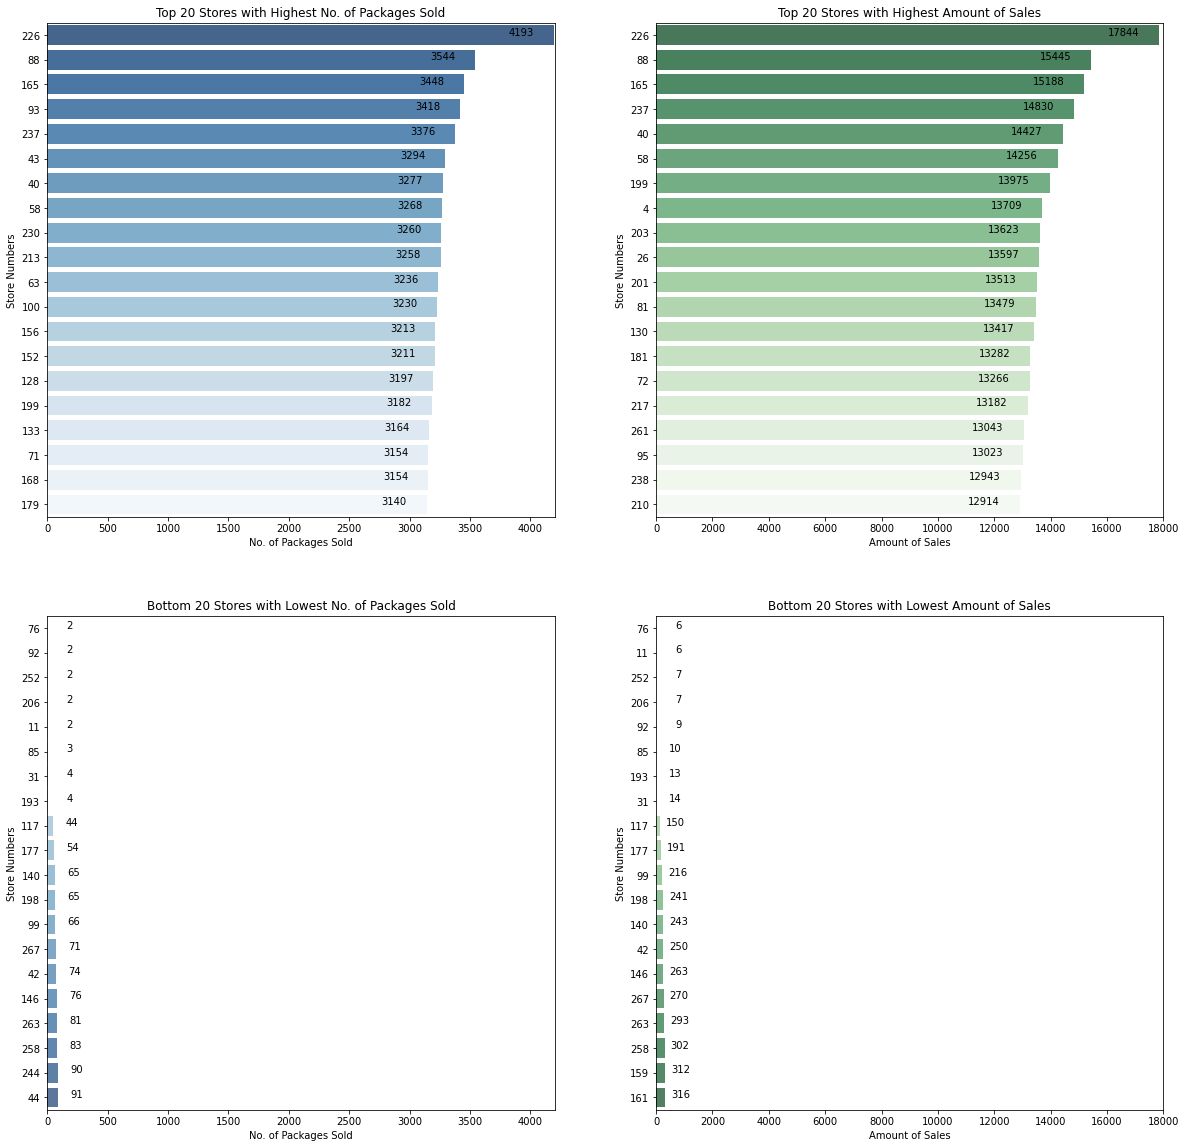

In [214]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

ax[0,0].set_title('Top 20 Stores with Highest No. of Packages Sold',fontsize=12)
df1=str2.sort_values('PROD_QTY',ascending=False).reset_index(drop=True).head(20)
ax[0,0] = sns.barplot(data=df1, x='PROD_QTY', y=df1.index, orient='h',palette="Blues_r",alpha=0.8,ax=ax[0,0],dodge=False)
ax[0,0].set(xlabel="No. of Packages Sold",ylabel="Store Numbers")
ax[0,0].set_yticklabels(df1['STORE_NBR'])
# set the bar labels
for p in ax[0,0].patches:
    ax[0,0].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-20,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right') 
ax[0,0].set_xlim(0,4200)


ax[1,0].set_title('Bottom 20 Stores with Lowest No. of Packages Sold',fontsize=12)
df2=str2.sort_values('PROD_QTY',ascending=True).reset_index(drop=True).head(20)
ax[1,0] = sns.barplot(data=df2, x='PROD_QTY', y=df2.index, orient='h',palette="Blues",alpha=0.7,ax=ax[1,0],dodge=False)
ax[1,0].set(xlabel="No. of Packages Sold",ylabel="Store Numbers")
ax[1,0].set_yticklabels(df2['STORE_NBR'])
# set the bar labels
for p in ax[1,0].patches:
    ax[1,0].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(25,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right') 
ax[1,0].set_xlim(0,4200)


ax[0,1].set_title('Top 20 Stores with Highest Amount of Sales',fontsize=12)
df3=str2.sort_values('TOT_SALES',ascending=False).reset_index(drop=True).head(20)
ax[0,1] = sns.barplot(data=df3, x='TOT_SALES', y=df3.index, orient='h',palette="Greens_r",alpha=0.75,ax=ax[0,1],dodge=False)
ax[0,1].set(xlabel="Amount of Sales",ylabel="Store Numbers")
ax[0,1].set_yticklabels(df3['STORE_NBR'])
# set the bar labels
for p in ax[0,1].patches:
    ax[0,1].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-20,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right') 
ax[0,1].set_xlim(0,18000)


ax[1,1].set_title('Bottom 20 Stores with Lowest Amount of Sales',fontsize=12)
df4=str2.sort_values('TOT_SALES',ascending=True).reset_index(drop=True).head(20)
ax[1,1] = sns.barplot(data=df4, x='TOT_SALES', y=df4.index, orient='h',palette="Greens",alpha=0.7,ax=ax[1,1],dodge=False)
ax[1,1].set(xlabel="Amount of Sales",ylabel="Store Numbers")
ax[1,1].set_yticklabels(df4['STORE_NBR'])
# set the bar labels
for p in ax[1,1].patches:
    ax[1,1].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(25,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right') 
ax[1,1].set_xlim(0,18000)

plt.savefig('D:\\ProjectQuantium\\Plots\\Stores_byNumber&SalesAmount.jpeg',bbox_inches='tight')
plt.show()

## <br /><br /> 5. Analysis by Customer

In [217]:
tc_df.head()

,DATE,YEAR,MONTH,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_BRAND,PROD_WEIGHT,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,2018.0,Oct,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,NCC,175g,2.0,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,2019.0,May,1.0,1307,348.0,66.0,CCs Nacho Cheese 175g,CCs,175g,3.0,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,2018.0,Nov,1.0,1307,346.0,96.0,WW Original Stacked Chips 160g,Woolworths,160g,2.0,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,2019.0,Mar,1.0,1307,347.0,54.0,CCs Original 175g,CCs,175g,1.0,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,2019.0,May,1.0,1343,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,Smiths,170g,2.0,2.9,MIDAGE SINGLES/COUPLES,Budget


In [218]:
tc_df['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     51544
RETIREES                  47140
OLDER FAMILIES            45888
YOUNG FAMILIES            41155
YOUNG SINGLES/COUPLES     34646
MIDAGE SINGLES/COUPLES    23808
NEW FAMILIES               6608
Name: LIFESTAGE, dtype: int64

In [219]:
tc_df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    96560
Budget        88188
Premium       66041
Name: PREMIUM_CUSTOMER, dtype: int64

Plot distribution of customer types and customer purchasing category

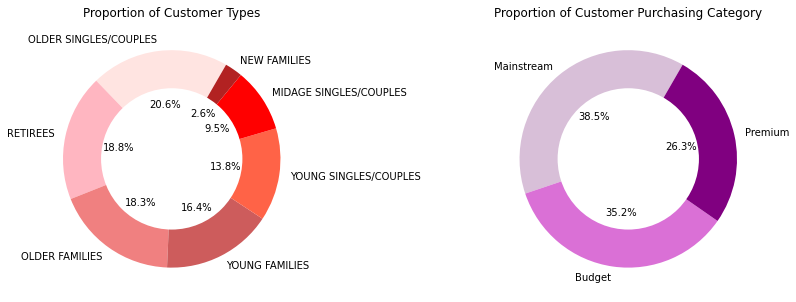

In [220]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1,2,1).set(title='Proportion of Customer Types')
ax=tc_df['LIFESTAGE'].value_counts().plot.pie(autopct="%.1f%%",startangle=60,
                                              colors=["mistyrose","lightpink","lightcoral","indianred",
                                                      "tomato","red","firebrick"],pctdistance=0.50,labeldistance=1.1)
ax.set_ylabel(None)
ax.legend().set_visible(False)
#add a white middle circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(1,2,2).set(title='Proportion of Customer Purchasing Category')
ax=tc_df['PREMIUM_CUSTOMER'].value_counts().plot.pie(autopct="%.1f%%",startangle=60,
                                                     colors=["thistle","orchid","purple"],pctdistance=0.50,labeldistance=1.1)
ax.set_ylabel(None)
ax.legend().set_visible(False)
#add a white middle circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig('D:\\ProjectQuantium\\Plots\\CustTypeCateg.jpeg',bbox_inches='tight')
plt.show()

Plot distribution of customer type within each purchasing category

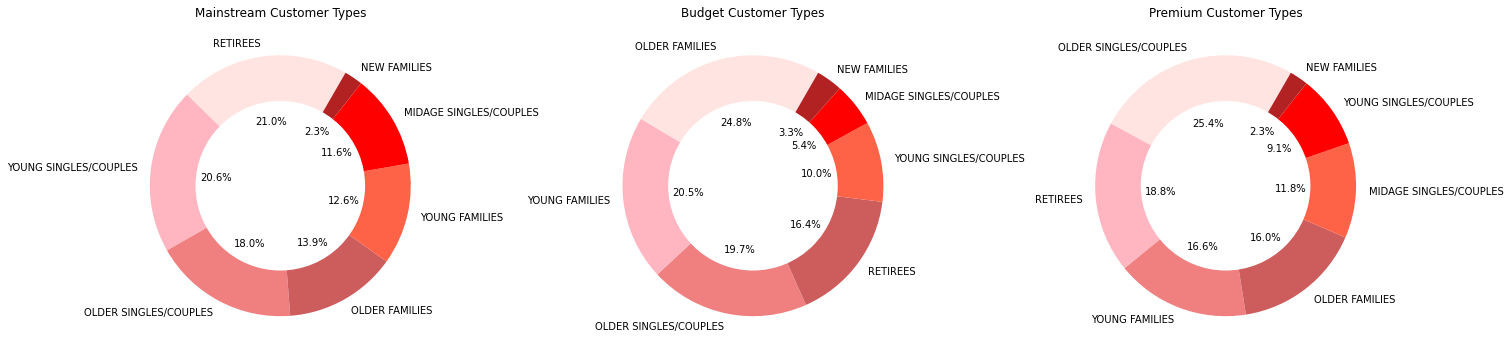

In [221]:
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

plt.subplot(1,3,1).set(title='Mainstream Customer Types')
ax=tc_df[tc_df['PREMIUM_CUSTOMER']
         =="Mainstream"]['LIFESTAGE'].value_counts().plot.pie(autopct="%.1f%%",startangle=60,
                                              colors=["mistyrose","lightpink","lightcoral","indianred",
                                                      "tomato","red","firebrick"],pctdistance=0.50,labeldistance=1.1)
ax.set_ylabel(None)
ax.legend().set_visible(False)
#add a white middle circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(1,3,2).set(title='Budget Customer Types')
ax=tc_df[tc_df['PREMIUM_CUSTOMER']
         =="Budget"]['LIFESTAGE'].value_counts().plot.pie(autopct="%.1f%%",startangle=60,
                                                     colors=["mistyrose","lightpink","lightcoral","indianred",
                                                      "tomato","red","firebrick"],pctdistance=0.50,labeldistance=1.1)
ax.set_ylabel(None)
ax.legend().set_visible(False)
#add a white middle circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(1,3,3).set(title='Premium Customer Types')
ax=tc_df[tc_df['PREMIUM_CUSTOMER']
         =="Premium"]['LIFESTAGE'].value_counts().plot.pie(autopct="%.1f%%",startangle=60,
                                                     colors=["mistyrose","lightpink","lightcoral","indianred",
                                                      "tomato","red","firebrick"],pctdistance=0.50,labeldistance=1.1)
ax.set_ylabel(None)
ax.legend().set_visible(False)
#add a white middle circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.savefig('D:\\ProjectQuantium\\Plots\\CustCateg_types.jpeg',bbox_inches='tight')
plt.show()

Group by Customer Purchasing Category and find sum of quantity and sales amount

In [222]:
cs1 = tc_df[['PREMIUM_CUSTOMER','PROD_QTY',
             'TOT_SALES']].groupby('PREMIUM_CUSTOMER').agg({'PROD_QTY':'sum','TOT_SALES':'sum'}).reset_index()

cs1.head()

,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,Budget,167747.0,636632.85
1,Mainstream,182813.0,706252.50
2,Premium,125751.0,478199.05


In [223]:
cs1['PREMIUM_CUSTOMER']

0        Budget
1    Mainstream
2       Premium
Name: PREMIUM_CUSTOMER, dtype: object

Plot proportion of amount of sales and quantity sold by Customer Purchasing Category

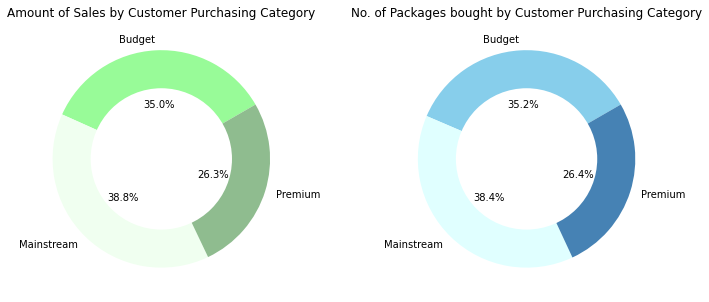

In [224]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.subplot(1,2,1).set(title='Amount of Sales by Customer Purchasing Category')
ax=cs1['TOT_SALES'].plot.pie(autopct="%.1f%%",startangle=30,labels=cs1['PREMIUM_CUSTOMER'],
                             colors=['palegreen','honeydew','darkseagreen'],pctdistance=0.50,labeldistance=1.1)
ax.set_ylabel(None)
ax.legend().set_visible(False)
#add a white middle circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(1,2,2).set(title='No. of Packages bought by Customer Purchasing Category')
ax=cs1['PROD_QTY'].plot.pie(autopct="%.1f%%",startangle=30,labels=cs1['PREMIUM_CUSTOMER'],
                              colors=['skyblue','lightcyan','steelblue'],pctdistance=0.50,labeldistance=1.1)
ax.set_ylabel(None)
ax.legend().set_visible(False)
#add a white middle circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig('D:\\ProjectQuantium\\Plots\\CustCateg_Numbers&Sales.jpeg',bbox_inches='tight')
plt.show()

Group by Customer Purchasing Category and Product Brand and find number of times a brand was bought by each category

In [225]:
cs2 = tc_df.groupby(['PREMIUM_CUSTOMER','PROD_BRAND']).size().reset_index(name='PURCHASE_FRQ')
cs2.head()

,PREMIUM_CUSTOMER,PROD_BRAND,PURCHASE_FRQ
0,Budget,Burger,579
1,Budget,CCs,1679
2,Budget,Cheetos,1051
3,Budget,Cheezels,1626
4,Budget,Cobs,3274


Plot Order of Brands Purchased by Customer Purchase Category 

<Figure size 2160x720 with 0 Axes>

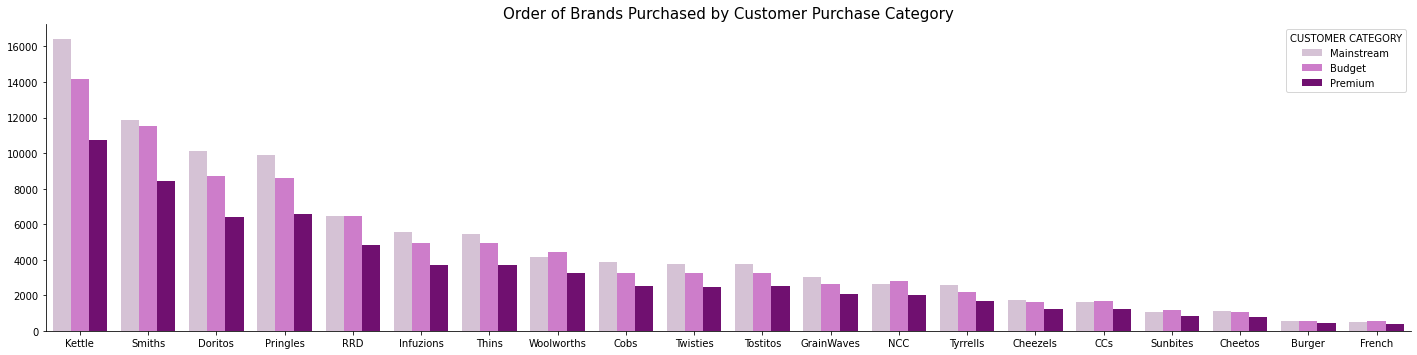

In [226]:
plt.figure(figsize=(30, 10))

df = cs2.sort_values('PURCHASE_FRQ',ascending=False).reset_index(drop=True)
ax = sns.catplot(data=df, x='PROD_BRAND', y='PURCHASE_FRQ', kind="bar", hue='PREMIUM_CUSTOMER',
                 palette=['thistle','orchid','purple'], aspect=4, legend=False)
plt.title('Order of Brands Purchased by Customer Purchase Category', fontsize=15)
ax.set(xlabel="",ylabel="")
plt.legend(title='CUSTOMER CATEGORY')

plt.savefig('D:\\ProjectQuantium\\Plots\\CustCateg_byBrand.jpeg',bbox_inches='tight')
plt.show()

Group by Loyalty Card No of Customer and Customer Purchasing Category and find sum of quantity and sales amount

In [227]:
cs3 = tc_df[['LYLTY_CARD_NBR',
             'PREMIUM_CUSTOMER','PROD_QTY','TOT_SALES']].groupby(['LYLTY_CARD_NBR',
                                                                 'PREMIUM_CUSTOMER']).agg({'PROD_QTY':'sum',
                                                                                          'TOT_SALES':'sum'}).reset_index()
cs3.head()

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,1000,Premium,2.0,6.0
1,1002,Mainstream,1.0,2.7
2,1003,Budget,2.0,6.6
3,1004,Mainstream,1.0,1.9
4,1005,Mainstream,1.0,2.8


In [228]:
cs31 = cs3.sort_values('PROD_QTY',ascending=False).reset_index(drop=True)

In [238]:
cs31.head(21)

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,226000,Premium,400.0,1300.0
1,230078,Budget,36.0,138.6
2,162039,Mainstream,36.0,126.8
3,179228,Budget,32.0,120.8
4,113080,Mainstream,32.0,107.8
5,116181,Premium,32.0,112.4
6,109036,Premium,32.0,113.0
7,129050,Premium,31.0,93.5
8,105026,Budget,31.0,114.2
9,257202,Budget,31.0,104.1


In [230]:
cs31['PROD_QTY'].median()

5.0

In [231]:
cs32 = cs3.sort_values('TOT_SALES',ascending=False).reset_index(drop=True)

In [239]:
cs32.head(21)

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,226000,Premium,400.0,1300.00
1,230078,Budget,36.0,138.60
2,162039,Mainstream,36.0,126.80
3,58361,Budget,28.0,124.80
4,63197,Budget,30.0,122.60
5,179228,Budget,32.0,120.80
6,199157,Premium,26.0,118.80
7,3153,Premium,26.0,116.40
8,28020,Premium,30.0,115.60
9,116113,Premium,28.0,115.40


In [240]:
cs32['TOT_SALES'].median()

20.2

Plot distribution of quantity bought and amount of sales by individual customers

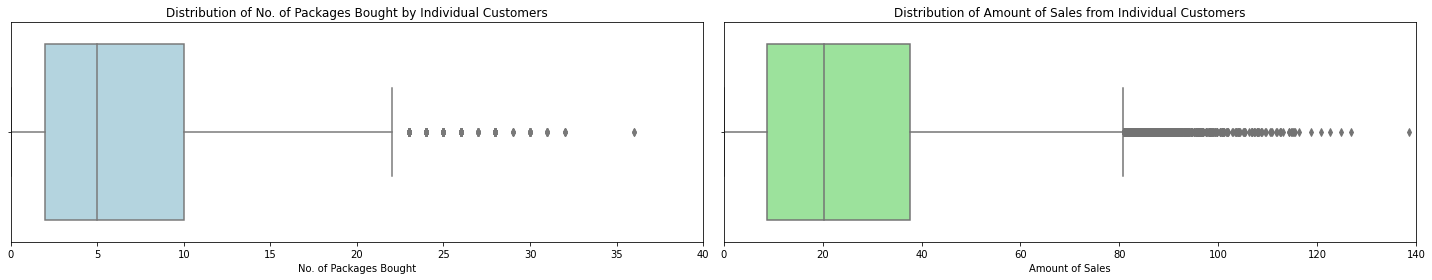

In [254]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

plt.subplot(1,2,1).set(title='Distribution of No. of Packages Bought by Individual Customers')
ax = sns.boxplot(data=cs31,x='PROD_QTY',color='lightblue')
plt.xlabel('No. of Packages Bought')
plt.xlim(0,40)


plt.subplot(1,2,2).set(title='Distribution of Amount of Sales from Individual Customers')
ax = sns.boxplot(data=cs32,x='TOT_SALES',color='lightgreen')
plt.xlabel('Amount of Sales')
plt.xlim(0,140)

plt.tight_layout()
plt.savefig('D:\\ProjectQuantium\\Plots\\CustPkgSalesAmount_dist.jpeg',bbox_inches='tight')
plt.show()

In [242]:
cs31['Label']=np.nan
cs32['Label']=np.nan

for i in range(len(cs31)):
    cs31['Label'][i]= "Loyalty Card No: " + str(cs31["LYLTY_CARD_NBR"][i])

for i in range(len(cs32)):
    cs32['Label'][i] = "Loyalty Card No: " + str(cs32["LYLTY_CARD_NBR"][i])

<ipython-input-242-c5da25b4581d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs31['Label'][i]= "Loyalty Card No: " + str(cs31["LYLTY_CARD_NBR"][i])
<ipython-input-242-c5da25b4581d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs32['Label'][i] = "Loyalty Card No: " + str(cs32["LYLTY_CARD_NBR"][i])


Plot top customers (loyalty card no.) by quantity of packages bought and amount of sales  

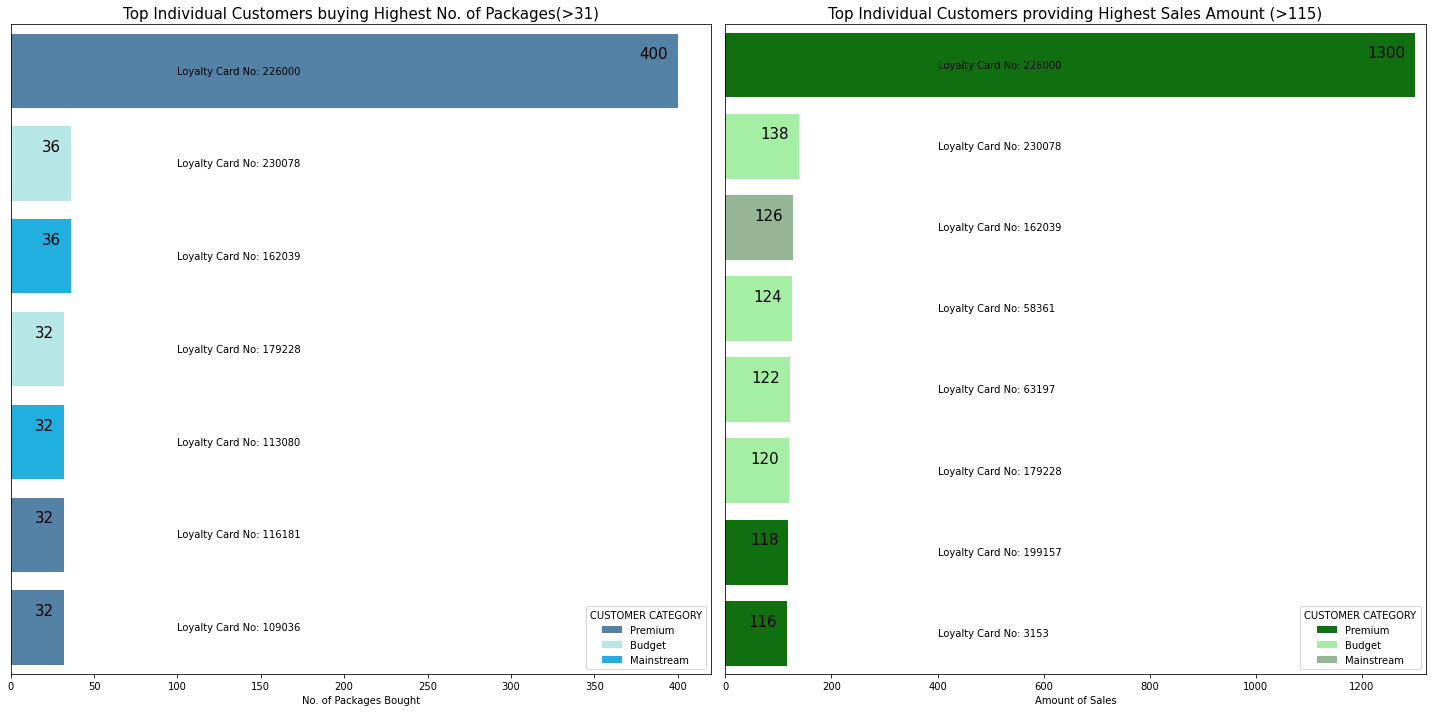

In [249]:
fig, ax =plt.subplots(1,2,figsize=(20,10))

ax[0].set_title('Top Individual Customers buying Highest No. of Packages(>31)',fontsize=15)
df1=cs31.head(7)
ax[0] = sns.barplot(data=df1, x='PROD_QTY', y=df1.index, orient='h',hue='PREMIUM_CUSTOMER',
                    palette=['steelblue','paleturquoise','deepskyblue'],ax=ax[0],dodge=False)
ax[0].set(xlabel="No. of Packages Bought",ylabel="")
ax[0].get_yaxis().set_visible(False)
ax[0].legend(title='CUSTOMER CATEGORY')
# write messages on bars
for bar, msg in zip(ax[0].patches, df1['Label']):
     ax[0].text(100, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')
# set the bar labels
for p in ax[0].patches:
    ax[0].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-10,-25),fontsize=15,color='black',textcoords='offset points',horizontalalignment='right') 
ax[0].set_xlim(0,420)


ax[1].set_title('Top Individual Customers providing Highest Sales Amount (>115)',fontsize=15)
df2=cs32.head(8)
ax[1] = sns.barplot(data=df2, x='TOT_SALES', y=df2.index, orient='h',hue='PREMIUM_CUSTOMER',
                    palette=['green','palegreen','darkseagreen'],ax=ax[1],dodge=False)
ax[1].set(xlabel="Amount of Sales",ylabel="")
ax[1].get_yaxis().set_visible(False)
ax[1].legend(title='CUSTOMER CATEGORY')
# write messages on bars
for bar, msg in zip(ax[1].patches, df2['Label']):
     ax[1].text(400, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')
# set the bar labels
for p in ax[1].patches:
    ax[1].annotate( p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-10,-25),fontsize=15,color='black',textcoords='offset points',horizontalalignment='right') 
ax[1].set_xlim(0,1320)


plt.tight_layout()
plt.savefig('D:\\ProjectQuantium\\Plots\\CustPkgSalesAmount_Top20.jpeg',bbox_inches='tight')
plt.show()